In [5]:
import os
import json
import matplotlib.pyplot as plt
import re
from os import path

parent_path = os.getcwd()
log_path = path.join(parent_path,'log')

files = [pos_json for pos_json in os.listdir(log_path) if pos_json.endswith('.json')]

In [6]:

model_dict = dict()
for file in files:

    with open(path.join(log_path, file)) as f:
        json_data = json.load(f)
    model_fullName = list(json_data.keys())[0]
    model_dict[model_fullName] = json_data[model_fullName]
    model_dict[model_fullName]['model_info'] = (re.split('_', model_fullName))
    

### Plot Models Individually

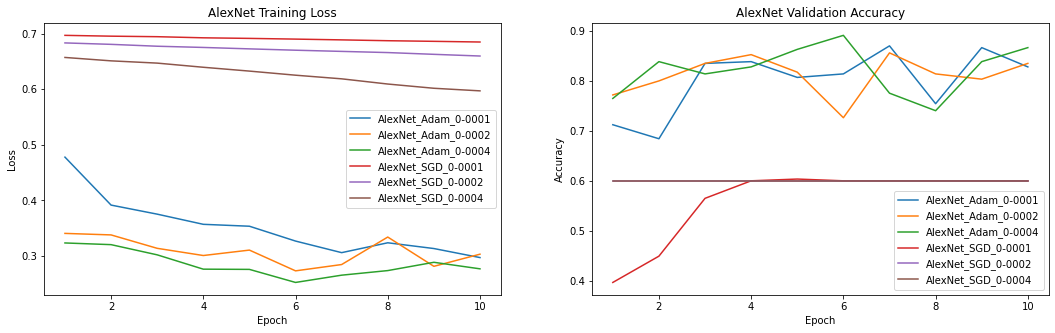

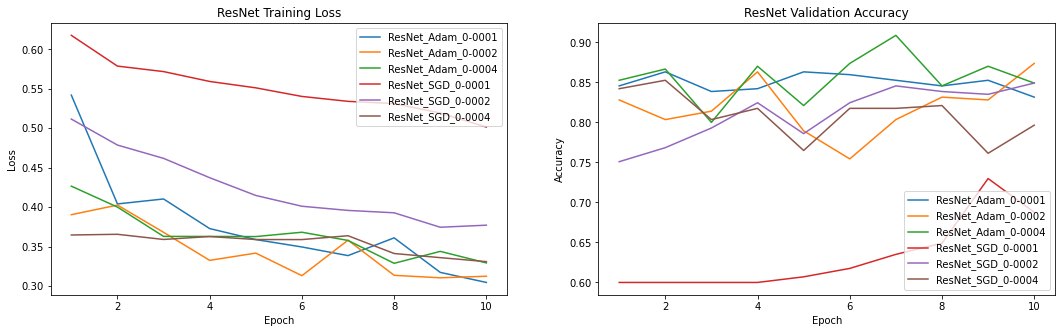

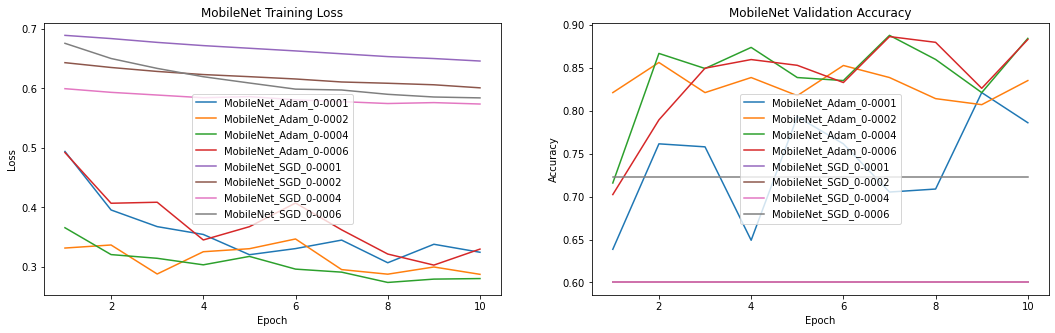

In [7]:

def plot_model(model_name, model_dict):
    epoch_num  = list(range(1,11))
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 5))
    for model in list(model_dict.keys()):
        if model_dict[model]['model_info'][0] == model_name:
            ax[0].plot(epoch_num, model_dict[model]['training loss'], label = model)
            ax[1].plot(epoch_num, model_dict[model]['validation accuracy'], label = model)

    ax[0].set_title(model_name + ' Training Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Loss')
    ax[0].legend()
    ax[1].set_title(model_name + ' Validation Accuracy')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Accuracy')
    ax[1].legend()

    fig.savefig(path.join(path.join(parent_path, 'plots'),model_name+'.png'), bbox_inches = 'tight')


plot_model('AlexNet', model_dict)
plot_model('ResNet', model_dict)
plot_model('MobileNet', model_dict)


### Compare Models

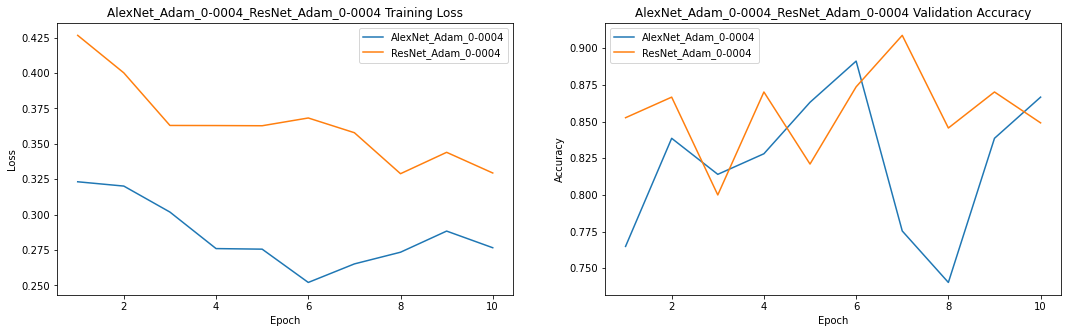

In [8]:
def plot_best_models(best_models, model_dict):
    epoch_num  = list(range(1,11))
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 5))
    fig_name = '_'.join(best_models)
    for model in best_models:
        ax[0].plot(epoch_num, model_dict[model]['training loss'], label = model)
        ax[1].plot(epoch_num, model_dict[model]['validation accuracy'], label = model)

    ax[0].set_title(fig_name + ' Training Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Loss')
    ax[0].legend()
    ax[1].set_title(fig_name + ' Validation Accuracy')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Accuracy')
    ax[1].legend()

    fig.savefig(path.join(path.join(parent_path, 'plots'),fig_name+'.png'), bbox_inches = 'tight')

plot_best_models(['AlexNet_Adam_0-0004', 'ResNet_Adam_0-0004'], model_dict)

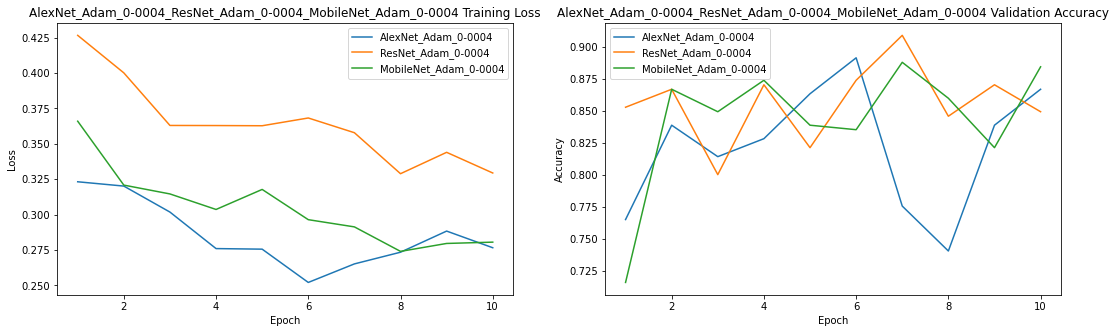

In [17]:
plot_best_models(['AlexNet_Adam_0-0004', 'ResNet_Adam_0-0004', 'MobileNet_Adam_0-0004'], model_dict)